In [1]:
MODEL_PATH = "../model.onnx"
TEST_IMAGES_PATH = "../UCMercedTestImages"

In [2]:
import onnxruntime as ort
import numpy as np
import torchvision as tv
from PIL import Image

In [3]:
ort_session = ort.InferenceSession(MODEL_PATH)

In [4]:
ort_session.get_inputs()[0].name, ort_session.get_inputs()[0].shape, ort_session.get_inputs()[0].type

('input.1', [1, 3, 256, 256], 'tensor(float)')

In [5]:
ort_session.get_outputs()[0].name, ort_session.get_outputs()[0].shape, ort_session.get_outputs()[0].type

('191', [1, 21], 'tensor(float)')

In [6]:
img_transforms = tv.transforms.Compose(
    [
        tv.transforms.Resize((256, 256)),
        tv.transforms.ToTensor(),
        tv.transforms.Normalize(
            (0.48422758, 0.49005175, 0.45050276),
            (0.17348297, 0.16352356, 0.15547496),
        ),
    ]
)

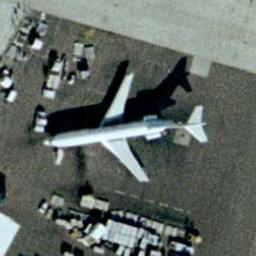

In [7]:
img = Image.open(f"{TEST_IMAGES_PATH}/airplane.jpg")
img

In [8]:
img_inp = img_transforms(img)
img_inp = img_inp.unsqueeze(0).numpy()
img_inp.shape

(1, 3, 256, 256)

In [9]:
out = ort_session.run(None, {ort_session.get_inputs()[0].name: img_inp})
out

[array([[ -3.8438292,  27.123774 ,   0.883858 ,   3.4714627,   2.6234615,
          -1.9269731,   2.1939526,  -5.0082197,   2.3666391,   1.0579835,
           9.47881  ,   2.9255505,  -7.4926085,  10.224329 ,   1.8984126,
          -7.463656 ,  -6.936611 ,  -8.39109  ,  -9.809774 ,  -5.8482323,
         -10.353999 ]], dtype=float32)]

In [10]:
categories = [
    "agricultural",
    "airplane",
    "baseballdiamond",
    "beach",
    "buildings",
    "chaparral",
    "denseresidential",
    "forest",
    "freeway",
    "golfcourse",
    "harbor",
    "intersection",
    "mediumresidential",
    "mobilehomepark",
    "overpass",
    "parkinglot",
    "river",
    "runway",
    "sparseresidential",
    "storagetanks",
    "tenniscourt",
]

In [11]:
category = np.argmax(out[0])
category, categories[category]

(1, 'airplane')